# review 3

- 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 칼럼 타입 확인해보자

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- pandas의 object 타입은 string 문자열 타입으로 봐도 무방하다. 
- 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 전처리 수행해야 함
  - DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경하자.

- Null 컬럼들에 대한 전처리

In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True) # 어차피 문자열 칼럼이라서 일단 Null도 문자열로 변환
titanic_df['Embarked'].fillna('N',inplace=True) # 어차피 문자열 칼럼이라서 일단 Null도 문자열로 변환

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [4]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.isnull().sum().sum()

0

- 현재 남아있는 문자열 feature는 Sex,Cabin,Embarked이다. 

In [7]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin의 경우 N이 687건으로 가장 많은 것이 좀 특이하긴 함.
  - 속성값이 제대로 정리되지 않은 것 같음
- Cabin의 경우 첫글자가 제일 중요해보이므로 첫글자만 따서 재정리해보자

In [8]:
titanic_df['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [9]:
# 문자열 인덱싱해서 새로운 열 생성하기(여기서는 기존의 열 Cabin을 인덱싱해서 기존의 열 구성을 변경해준 것임)
# 문자열 쪼개서 새로운 열을 생성해줄 수도 있다.
# 다음을 참고한다. 
# https://hleecaster.com/pandas-data-cleaning-2/
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

- 머신러닝 알고리즘을 적용해 예측 수행 전, 데이터를 먼저 탐색해보자
  - 어떤 유형의 승객이 생존 확률이 높을까?
  - 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해보자

In [10]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

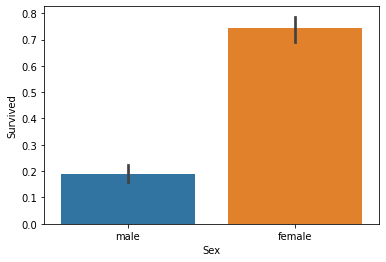

In [11]:
sns.barplot(x='Sex', y='Survived', data = titanic_df)

- 부자와 가난한 사람 간의 생존 확률에 대해 알아보자
  - 객실 등급으로 확인할 수 있을 것이다. 
  - + 성별까지 함께 고려해보자 
    - hue 파라미터를 추가해주면 된다. 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

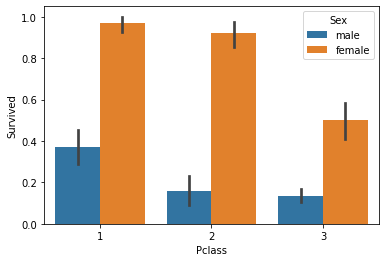

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

- 분석
  - 여성의 경우 일,이등실에 따른 생존 확률의 차이가 크지 않으나. 삼등실의 경우 생존 확률이 상대적으로 많이 떨어졌다.
  - 남성의 경우 일등실의 생존확률이 이,삼등실의 생존확률보다 월등히 높다. 

- Age에 따른 생존 확률을 알아보자
  - 값 종류가 많기 때문에 카테고리를 나눠서 분석해보자

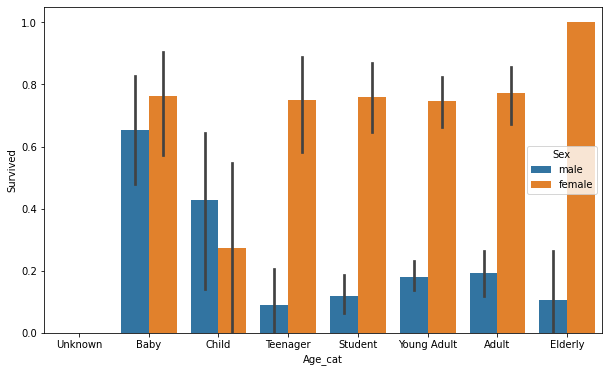

In [13]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# DataFrame의 apply lambda식에 사용
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
# order = group_names을 통해 X축의 값을 순차적으로 표시해준다.
titanic_df.drop('Age_cat', axis=1, inplace=True) # 그래프 그리려고 사용했던 칼럼이니까 사용 뒤 삭제해주는 것

- 분석
  - 여자 Baby의 경우 생존 확률이 높다. 
  - 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮다. 
  - 여자 Elderly의 경우 매우 높은 생존 확률을 보인다. 

---
>  결론

    Sex, Age, PClass 등이 생존을 좌우하는 feature임을 어느 정도 확인할 수 있었다. 

---

- 좀 전에 확인했던 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환해보자
  - LabelEncoder 클래스 활용

In [14]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder() # 객체 생성
        le = le.fit(dataDF[feature]) # 데이터 변환을 위한 기준 정보 설정
        dataDF[feature] = le.transform(dataDF[feature]) # 설정된 기준 정보를 이용하여 데이터 변환
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- for문에서 features를 지정해준 속성들이 숫자형으로 바뀐 것을 알 수 있다. 

---

- 지금까지 수행한 전처리
  - 1) Null 처리
  - 2) 머신러닝 알고리즘에 불필요한 속성 제거
  - 3) 레이블 인코딩
  - 그리고 1)~3)을 호출해줄 함수 설정

In [15]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True) # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Embarked'].fillna('N',inplace=True) # # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

######### 위 세 함수 모두 마지막에 return df를 입력해주었는데
######### 그렇게 함으로써 아래에서 df=df, df=df, df=df 를 통해 df를 함수를 이용한 결과로 업데이트 해줄 수 있다. 



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 이제 데이터 전처리 수행하는 함수인 `transfrom_features`를 만든 것이다.
  - 이를 이용해 원본 데이터를 한 번 가공해보자

In [16]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

- 테스트 데이터 추출

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

- ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 생존자 예측을 수행해보자
  - 예측 성능 평가는 accuracy, 정확도로 한다. 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #  예측 성능 평가

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11) # 객체 생성
rf_clf = RandomForestClassifier(random_state=11) # 객체 생성
lr_clf = LogisticRegression() # 객체 생성 , 회귀이기 때문에 random_state 설정해줄 필요 없다. 

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# error 발생 부분
# LogisticRegression 학습/예측/평가
# lr_clf.fit(X_train , y_train)
# lr_pred = lr_clf.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547


> 결론 : 3개의 ML 모델 中 LogisticRegression 정확도가 가장 높음

---

- 마지막 줄은  'str' object has no attribute 'decode'라는 ERROR 발생
  - [해결책 출처](https://www.inflearn.com/questions/126731)
  - sol 1) !pip install h5py==2.10.0
  - sol 2) !pip install h5py==2.10.0 --force-reinstall (Anaconda prompt 관리자 권한 실행)
  - sol 3) markdown==3.2.2 설치
  - 모두 해결 안 된다면, 내부 패키지가 꼬였을 확률 높음
    - Google Colab으로 해결하면 된다.

---

- 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정한다.

In [19]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)


def exec_kfold(clf, folds=5): # clf = 모델의 객체 자리
    kfold = KFold(n_splits=folds) # 폴드 세트를 5개인 KFold 객체를 생성
    scores = [] # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        # enumerate : 이 함수는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아서 
        # 인덱스 값을 포함(!!!)하는 enumerate 객체를 리턴합니다, 그에 따른 결과도 보여주고.
        
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train)  # 학습
        predictions = clf.predict(X_test)  # 예측
        accuracy = accuracy_score(y_test, predictions)  # 정확도
        scores.append(accuracy) # 종전에 정확도 담으려고 만들어뒀던 list
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    # for문 벗어났음
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [20]:
kfold = KFold(n_splits=5)
kfold.split(X_titanic_df)

<generator object _BaseKFold.split at 0x000001FF27489CF0>

- iterable과 iterator의 의미
  - https://bluese05.tistory.com/55
- generator
  - https://bluese05.tistory.com/56
  - iterator를 생성해주는 function이다. 
  - iterator는 next() 메소드를 이용해 데이터에 순차적으로 접근이 가능한 object이다. 

- 교차 검증을 cross_val_score() API를 이용해 수행해보자

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- K폴드의 평균 정확도가 약간 상이한데, 이는 cross_val_score()가 stratifiedKFold를 이용해 폴드세트를 분할하기 때문이다.

- GridSearchCV를 이용해 최적 하이퍼 파라미터를 찾고 예측 성능을 측정하자

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

# 최적 하이퍼 파라미터로 학습된 estimator를 이용해,\
# 위의 train_test_split으로 분리된 테스트 데이터 세트에 예측을 수행해 정확도 출력
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test) # 예측
accuracy = accuracy_score(y_test , dpredictions) # 평가
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


- 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.
- 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다.

***`테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높다.`***
  - 이를 해결하기 위해
    - 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증을 수행할 수 있다.
    - KFold, StratifiedKFold, cross_val_score, GridSearchCV

---

- 분류의 성능 평가 지표에 대해 알아보자(특히나 이진 분류에서 중요)
  - 정확도
  - 오차행렬
  - 정밀도
  - 재현율
  - F1 스코어
  - ROC AUC

- 분류
  - 결정 클래스가 2개 : 이진 분류
  - 결정 클래스가 여러 개 : 멀티 분류

In [23]:
import numpy as np
from sklearn.base import BaseEstimator


# BaseEstimator 클래스를 상속받아, 아무런 학습 X, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성
# 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있다.
class MyDummyClassifier(BaseEstimator): # 상속 받는 中
   
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리하는 함수
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier() # 객체 생성
myclf.fit(X_train ,y_train) # 학습 수행
mypredictions = myclf.predict(X_test) # 예측 수행
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions))) # 평가 수행

Dummy Classifier의 정확도는: 0.7877


- 정확도 평가지표의 맹점 : 데이터 분포도가 균일하지 않는 경우 높은 수치가 나타날 수 있음
  - 150p 참고

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# Customized 형태의 Estimator를 생성할 수 있다. 
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator): # BaseEstimator 클래스로부터 상속받는 중
    def fit(self,X,y):
        pass # 학습은 건너뛴다. 
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [26]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [27]:
(digits.target == 7).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [29]:
pd.Series(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
445    0
446    0
447    0
448    0
449    0
Length: 450, dtype: int32

In [30]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다. 
  - 극복 : 오차행렬에 대해 알아보자

- 오차 행렬
  - 이진 분류에서 성능지표로 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
  - 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
  - TN : True Negative 
  - FN : Fasle Negative
  - FP : False Positive
  - TP : True Positive
  - 앞문자는 예측값과 실제값이 같은가 틀린가
  - 뒤문자는 예측값

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- 왼쪽, 오른쪽 = 예측클래스로서 N,P
- 위, 아래 = 실제클래스로서 N,P

- 즉, (TN,FN) = (405,45)임을 알 수 있다.

- 이 값들을 조합해 Classifier의 성능 측정 지표를 알 수 있다.
  - 정확도 : 예측값과 실제값이 얼마나 동일한가
    - (TN + TP) / (TN + FP + FN + TP)
    - 불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측정확도가 높아지는 경향이 발생한다.
    - 정확도는 불균형한 이진 분류 데이터 세트에서 부적합할  수 있다는 것이다.
    - 정밀도나 재현율을 활용하는 게 더 좋다.
    - 정밀도나 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표이다.
  - 정밀도 (양성 예측 중 실제도 양성인 경우)
    - TP / (FP + TP) 
    - Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.
  - 재현율 (실제 양성 중 예측도 양성인 경우)
    - TP / (FN + TP)
    - 민감도 또는 TPR(True Positive Rate)이라고 불린다.
    - 암 판단 모델, 보험 사기와 같은 금융 사기 적발 모델과 같은 분야에서 중요할 것

- 보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 多
  - 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우
  - 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

- 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춘다.
  - 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다.
  - 가장 좋은 성능 평가는 둘 다 높은 수치를 얻는 것

```python
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
# (순서대로) 정확도, 정밀도, 재현율, 오차 행렬 불러옴

# 평가를 한 번에 호출하는 함수
def get_clf_eval(y_test , pred): # get classification evaluation
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
# 로지스틱 회귀 기반 예측 수행 후, 평가해보자
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived'] # 정답 레이블 추출
X_titanic_df= titanic_df.drop('Survived', axis=1) # feature 레이블 추출
# train_test_split 함수 사용위해서 정답레이블과 feature 레이블을 분리해서 넣어주어야 한다.그래서 분리해서 따로 저장해두었던 것

X_titanic_df = transform_features(X_titanic_df) # 앞에서 만들었던 데이터 전처리 한 번에 수행하는 함수

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train) # 학습 수행 中
pred = lr_clf.predict(X_test) # 예측 수행 中
get_clf_eval(y_test , pred) # 평가해보자
```

- 정밀도에 비해 재현율이 낮게 나왔다.
  - 다시 review
  - 정밀도 : 양성 예측 중 실제도 양성
  - 재현율 : 실제 양성 중 예측도 양성

---

- 정밀도/재현율 트레이드오프
  - 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.
    - 사이킷런의 분류 알고리즘 : 일반적으로 이진 분류에서는 결정 임계값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정.
  - 그러나 이 둘은 상호보완적인 지표, 시소의 관계에 있다. 이를 정밀도/재현율의 트레이드오프라고 부른다.

- 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()
- 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능.
  - ```python
  lr_clf.predict_proba(X_test)
  ```
- predict() 메서드와 유사하지만 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과이다.
  - 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률.

- predict_proba() 메서드와 predict() 메서드의 결과를 비교해보자

```python
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])




# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])



pred_proba_result에서, pred_proba는 2개의 칼럼, 그 옆에 한 개의 칼럼으로 이진 분류 결과값 붙여주기 위해서 
reshape함수 사용했음
reshape(-1,1) = 행은 상관하지 말고 1열로
reshape(-1,3) = 행은 상관하지 말고 3열로
reshape(1,-1) = 열은 상관하지 말고 1행으로
reshape(4,-1) = 열은 상관하지 말고 4행으로

np.concatenate => R에서의 rbind, cbind 느낌

```

> 위에서 LogisticRegression 객체에서 fit을 수행하지 못했음. 그래서 해당 셀도 수행하지 못함. 개념만 정리하겠음

- 사실 predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API이다.
- 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.

In [32]:
from sklearn.preprocessing import Binarizer


X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]


# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- 이제 이 Binarizer를 이용해 사이킷런의 predict()의 의사(pseudo) 코드를 만들어보자

```python
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼(두개의 컬럼 중 하나는 Negative, 두 번째는 Positive칼럼)
# 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 행은 상관하지 않고 1열로 추출

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
```

- 앞의 결과와 일맥상통
  - 이제 진짜 threshold를 조정해보자

```python
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)
```

- 임계값 하향 조정
  - 재현율 상승, 정밀도 하락
    - threshold = Positive 예측값을 결정하는 확률의 기준.
    - threshold 하향조정함으로써 Positive 결정이 너그러워졌음
    - True 값이 많아졌다.
    - Positive 예측값이 많아지면 상대적으로 재현율 값 상승
    - 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어듦

- 임계값은 0.4에서 0.5, 0.6 증가시키며 평가지표 확인

```python
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )
```

- threshold가 0.45일 경우에 default 값이었던 0.5인 경우와 비교해서, 정확도 동일, 정밀도 약간 하락, 재현율 상승
  - 재현율을 상승시키면서 다른 수치의 손해를 어느 정도 감안한다면 threshold = 0.45가 적당해 보인다.

----

- 이와 유사한 기능인 precision_recall_curve() API가 있다.
  - threshold별 정밀도와 재현율 알 수 있다.

- `precision_recall_curve()는 일반적으로 0.11~0.95 정도의 threshold를 담은 ndarray와 이 임계값에 해당하는 정밀도 및 재현율 값을 담은 ndarray를 반환한다` 

```python
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋(y_test)과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))ㅡ
```

- threshold 값이 증가할수록 정밀도 값은 동시에 높아지나. 재현율 값은 낮아진다.
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화 할 수 있다. (166p 참고)

-----

> 결론

    Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 
    임계값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.
    물론 분류가 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만, 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 돼서는 안 된다. (예를 들어, 암 예측 모델에서 재현율을 높인다고 걸핏하면 양성으로 판단하는 건 지양해야 하듯 말이다.)

---

- F1 스코어
  - 정밀도와 재현율을 결합한 지표
  - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
  - $2 * \frac{precision * recall}{precision + recall}$

```python
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))
```

- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표(정확도, 정밀도, 재현율, F1 스코어)를 구해보자

```python
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred) # 정밀도
    recall = recall_score(y_test , pred) # 재현율
    f1 = f1_score(y_test,pred) # F1 스코어 추가
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
```

- F1 스코어는 임곗값이 0.6일 때, 가장 좋은 값을 보여준다. 
  - 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주지해야 한다.

---

- ROC 곡선과 AUC(Area Under Curve : 곡선하면적)
  - ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
  - ROC 곡선은 FPR(False Positive Rate) = 1 - TNR 또는 1 - 특이성이 변할 때, TPR(True Positive Rate) = 재현율, 민감도가 어떻게 변하는지를 나타내는 곡선이다.

- 민감도(TPR)는 실제값 Positive가 정확히 예측돼야 하는 수준을 나타낸다. (질병이 있는 사람을 질병이 있는 것으로 양성 판정)
- 특이성(TNR)은 실제값 Negative가 정확히 예측돼야 하는 수준을 나타낸다. (질병이 없는 사람을 질병이 없는 것으로 음성 판정)
  - 민감도에 대응하는 지표가 특이성이다.

- 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공.
  - precision_recall_curve() API와 유사.

- ROC 곡선을 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값을 구해 보자.

```python
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환 결과 
# fpr = fpr 값을 array로 반환
# tpr = tpr 값을 array로 반환
# threshold = threshold 값 array

# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))
```

- 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커진다.
  - 임계값이 점점 작아진다 -> Positive 확률이 높아진다 -> FPR이 점점 커진다
  - 그리고 FPR이 조금씩 커질 때, TPR은 가파르게 커짐을 알 수 있다.

- ROC 곡선은 원점을 지나는 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것이다.

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.
- AUC 값은 일반적으로 1에 가까울수록 좋은 수치이다. 
- AUC가 커지려면 FPR이 작은 상테에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다. 

```python
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))
```

- 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값은 0.9024로 추정됐다.

```python
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    #### ROC-AUC 추가 #### 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
```

- ROC AUC는 예측 확률값을 기반으로 계산되므로 이를 get_clf_eval() 함수의 인자로 받을 수 있도록 
```python
def get_clf_eval(y_test, pred=None, pred_proba=None):
```
- 로 함수형을 변경해준다. 

> ### 함수에서 인자의 값으로 None 입력 ?

    값을 따로 주지 않으면, 실행 자체가 안 된다.
    None을 줌으로써 사용안 할 땐 그냥 할당하지 않으면 되고, 사용할 땐 할당을 해주면 된다.

In [13]:
def f1(a,b=None):
    print(a)
    print(b)

In [14]:
f1(123)

123
None


In [15]:
f1(123,14)

123
14
